# Analysis pipeline for Specificity

## Preliminaries

In [1]:
%cd ~/code/textrec/

/Users/kcarnold/code/textrec


In [2]:
import datetime
import json
import pathlib

import pandas as pd
import numpy as np
import toolz
from IPython.display import Image, HTML

In [140]:
from textrec.paths import paths
from textrec import analysis_util, util, notebook_util
reload(analysis_util), reload(util), reload(notebook_util)

(<module 'textrec.analysis_util' from '/Users/kcarnold/code/textrec/src/textrec/analysis_util.py'>,
 <module 'textrec.util' from '/Users/kcarnold/code/textrec/src/textrec/util.py'>,
 <module 'textrec.notebook_util' from '/Users/kcarnold/code/textrec/src/textrec/notebook_util.py'>)

In [8]:
from textrec.notebook_util import images, id2img, id2url, show_images

In [9]:
HTML(show_images([images_by_split['val'][0]['cocoid']]))

## Load results of writing experiment

In [157]:
%run -m textrec.batch_analysis

In [142]:
participants = get_participants_by_batch()

In [143]:
participants.keys()

dict_keys(['2018-04-09', '2018-04-24', '2018-04-27', '2018-05-02-invalid', '2018-05-02-old', '2018-05-02'])

In [144]:
len(participants['2018-05-02'])

25

In [17]:
# summarize('2018-04-27')
summarize('2018-05-02')


h52x67
practice-0:specific:a black cat napping on a sunny unpainted wood bench in front of a red wall
final-0-0:specific:a cat sitting next to a glass bowl, looking up to the camera
final-0-1:specific:a shower with dirty glass doors has a beige towel hanging on the outside
final-0-2:specific:there is no image here 
practice-1:norecs:a man with black hair and glasses placing a large turkey into an upper oven
final-1-0:norecs:a bride and groom cutting their wedding cake, while a photographer guides them
final-1-1:norecs:a man helping his children fly a multicolor butterfly kite on a clear day
final-1-2:norecs:a passenger train approaching a small quaint station with a blue and white building on the background
practice-2:general:a black and red vehicle with bikes on top and people standing nearby with umbrellas. 
final-2-0:general:a busy street in a historic town with a red bus driving on the street. 
final-2-1:general:a tennis player hits a ball during a game 
final-2-2:general:a surfer

practice-0:norecs:a black cat napping on a sunny unpainted wood bench in front of a red wall
final-0-0:norecs:a gray and beige cat looks upward as a half full glass of wine can be seen in the foreground
final-0-1:norecs:a closed shower door with crackled glass encases some hanging colored toiletries
final-0-2:norecs:a white bathroom sink and toilet with a mirror and a roll of unopened toilet paper
practice-1:general:a man with black hair and glasses placing a large turkey into an upper oven 
final-1-0:general:a man in a tuxexo and a woman in a gown are show how to cut their wedding cake by a woman holding a camera 
final-1-1:general:a man in a red shirt and two children stand on the beach and fly kites
final-1-2:general:an old train runs on the tracks in front of powder blue and white buildings
practice-2:specific:a black and red vehicle with bikes on top and people standing nearby with umbrellas. 
final-2-0:specific:a gorgeous european city with tall gothic buildings and a red trolley

practice-0:general:a black cat napping on a sunny unpainted wood bench in front of a red wall 
final-0-0:general:a  brownish-orange cat with yellow eyes is look to his left past a glass of red wine  
final-0-1:general:a person is taking a shower in a shower with very opaque sliding doors  
final-0-2:general:a bathroom with one white sink and a white toilet with a toilet paper roll on the back lid sits next to the sink which has a mirror above it which shows the exact same toilet across the room 
practice-1:norecs:a man with black hair and glasses placing a large turkey into an upper oven
final-1-0:norecs:a obvious dressed bride and groom at a wedding reception are cutting into their wedding cake with the help of the photographer whose hand is guiding theirs
final-1-1:norecs:a man and his two children are flying multicolored kites on a sandy beach 
final-1-2:norecs:a brown colored train is parked at an outdoor train station with three blue and white buildings
practice-2:specific:a black

practice-0:general:a black cat napping on a sunny unpainted wood bench in front of a red wall 
final-0-0:general:a half full glass of red wine on a table in front of a calico cat

final-0-1:general:a beige towel hanging on a translucent glass shower door
final-0-2:general:a white toilet and a white sink with a mirror above the sink 
practice-1:specific:a man with black hair and glasses placing a large turkey into an upper oven 
final-1-0:specific:a photographer holding the hand of a bride and groom as they cut their wedding cake 
final-1-1:specific:a msn helping two kids try to fly a kite on the beach 
final-1-2:specific:a train leaving a train station that has a blue and white building 
practice-2:norecs:a black and red vehicle with bikes on top and people standing nearby with umbrellas. 
final-2-0:norecs:a double decker bus driving down a street with old architecture buildings
final-2-1:norecs:a tennis player returning a shot on a court in the rogers centre in toronto
final-2-2:norec

_____________________________________________get_log_analysis_raw - 2.3s, 0.0min
practice-0:norecs:a black cat napping on a sunny unpainted wood bench in front of a red wall
final-0-0:norecs:a tabby cat is sitting in front of a wine glass
final-0-1:norecs:the doors to the shower are closed and made of glass you can partially see through. 
final-0-2:norecs:the mirror shows there are more than one toliets in this bathroom. 
practice-1:general:a man with black hair and glasses placing a large turkey into an upper oven 
final-1-0:general:a woman is standing next to a couple in front of a cake with a knife in it and holding the other womans hands
final-1-1:general:people are standing on the beach flying colorful kites 
final-1-2:general:there is a train stopped at a train station platform 
practice-2:specific:a black and red vehicle with bikes on top and people standing nearby with umbrellas. 
final-2-0:specific:there are people walking down the street with a red double decker bus in the mi

In [145]:
trial_data = get_trial_data(participants['2018-05-02'])

In [146]:
for trial in trial_data:
    trial['text'] = trial['text'].strip()

I had the wrong URL for one image when one person ran it.

In [147]:
# trial_data = [trial for trial in trial_data if not (trial['stimulus'] == 431140 and trial['participant'] == 'h52x67')]
trial_data = [trial for trial in trial_data if not trial['participant'] == 'h52x67']

In [148]:
len(list(toolz.pluck('text', trial_data)))

216

In [149]:
len(set(toolz.pluck('participant', trial_data)))

24

In [150]:
pd.DataFrame(trial_data).to_csv('data/trial_data.csv', index=False)

In [23]:
# pd.DataFrame(trial_data).to_clipboard()

In [156]:
block_level, experiment_level = get_survey_data(participants['2018-05-02'])

NameError: name 'pd' is not defined

In [154]:
DataFrame(experiment_level

,0,1,2
0,h52x67,use_predictive,Yes
1,h52x67,I like to solve complex problems.,2
2,h52x67,I have difficulty understanding abstract ideas.,1
3,h52x67,I feel comfortable around people.,3
4,h52x67,I have little to say.,2
5,h52x67,I need things explained only once.,3
6,h52x67,I try to avoid complex people.,4
7,h52x67,I make friends easily.,3
8,h52x67,I keep in the background.,3
9,h52x67,I can handle a lot of information.,3


In [137]:
conditions = [analyzed['byExpPage'][page]['condition'] for page in analyzed['pageSeq']][::4]

block_level = []
experiment_level = []

for k, v in analyzed['allControlledInputs']:
    segment, rest = k.split('-', 1)
    if segment == 'intro':
        experiment_level.append((participant_id, rest, v))
    elif segment == 'postTask':
        block, rest = rest.split('-', 1)
        block = int(block)
        if ' ' in rest:
            # Traits, TODO
            experiment_level.append((participant_id, rest, v))
        else:
            block_level.append((participant_id, block, rest, v))
    elif segment == 'postExp':
        if rest == 'age':
            v = int(v)
        if rest.startswith('helpfulRank'):
            # Decode which keyboard they're talking about
            assert v.startswith('Keyboard Design ')
            condition_idx = int(v[-1]) - 1
            experiment_level.append((participant_id, f'{rest}-idx', condition_idx))
            experiment_level.append((participant_id, f'{rest}-condition', conditions[condition_idx]))
        else:
            experiment_level.append((participant_id, rest, v))


In [138]:
experiment_level

[('h52x67', 'use_predictive', 'Yes'),
 ('h52x67', 'I like to solve complex problems.', 2),
 ('h52x67', 'I have difficulty understanding abstract ideas.', 1),
 ('h52x67', 'I feel comfortable around people.', 3),
 ('h52x67', 'I have little to say.', 2),
 ('h52x67', 'I need things explained only once.', 3),
 ('h52x67', 'I try to avoid complex people.', 4),
 ('h52x67', 'I make friends easily.', 3),
 ('h52x67', 'I keep in the background.', 3),
 ('h52x67', 'I can handle a lot of information.', 3),
 ('h52x67', 'I avoid difficult reading material.', 3),
 ('h52x67', 'I am skilled in handling social situations.', 3),
 ('h52x67', 'I would describe my experiences as somewhat dull.', 1),
 ('h52x67', 'I love to think up new ways of doing things.', 3),
 ('h52x67', 'I avoid philosophical discussions.', 1),
 ('h52x67', 'I am the life of the party.', 2),
 ('h52x67', "I don't like to draw attention to myself.", 4),
 ('h52x67', 'helpfulRank-specific-most-idx', 0),
 ('h52x67', 'helpfulRank-specific-most-co

In [139]:
block_level

[('h52x67', 0, 'sys-specific', 6),
 ('h52x67', 0, 'sys-accurate', 5),
 ('h52x67', 0, 'sys-fast', 6),
 ('h52x67', 0, 'mental', 3),
 ('h52x67', 0, 'physical', 0),
 ('h52x67', 0, 'temporal', 3),
 ('h52x67', 0, 'performance', 3),
 ('h52x67', 0, 'effort', 5),
 ('h52x67', 0, 'frustration', 5),
 ('h52x67', 0, 'techDiff', 'There was no image in he third task.'),
 ('h52x67',
  0,
  'other',
  'The keyboard seemed to have the words I wanted already there, on many of them all I had to do was touch the word.'),
 ('h52x67', 1, 'sys-specific', 0),
 ('h52x67', 1, 'sys-accurate', 3),
 ('h52x67', 1, 'sys-fast', 1),
 ('h52x67', 1, 'mental', 4),
 ('h52x67', 1, 'physical', 1),
 ('h52x67', 1, 'temporal', 4),
 ('h52x67', 1, 'performance', 2),
 ('h52x67', 1, 'effort', 2),
 ('h52x67', 1, 'frustration', 1),
 ('h52x67', 1, 'techDiff', 'None.'),
 ('h52x67',
  1,
  'other',
  'It was a little more challenging this time, because there were no predicted words. Also I had to be extra careful with spelling!'),
 ('h52

# Generate nAFC task

For each stimulus image, choose a foil set. It should be about equally difficult for each condition. Simplest approach: find the nearest caption to the concatenation of all captions we got for that image.

TODO: should we be computing similarities of individual captions, rather than complete images?

In [24]:
cap_vectorizer, caption_vecs = util.get_vectorized_captions()

In [25]:
caption_vecs.shape

(123287, 9952)

In [26]:
id2url[570528]

'http://images.cocodataset.org/train2017/000000570528.jpg'

In [27]:
concat_captions = {stimulus: '\n'.join(toolz.pluck('text', trials))
                   for stimulus, trials in toolz.groupby('stimulus', trial_data).items()}
concat_captions.keys()

dict_keys([275449, 396295, 431140, 227326, 200451, 223777, 247576, 71815, 240275])

In [28]:
# print(concat_captions[71815])
# print(concat_captions[275449])
print(concat_captions[396295])

a small bath with a shower with a blue mat on the floor
someome is using a shower but it's hard to see due to the opaque glass
i see a standing shower with two hazy sliding glass doors and a towel hanging off of one.
a tan towel hangs in front of a glass shower
brown towel is hanging on a sliding shower door
a beige towel hangs over the rightmost shower door both of which are wet with water
a closed shower door with crackled glass encases some hanging colored toiletries
a rusty and dirty shower in the bathroom has a tan towel over its handle
a sliding glass shower door with a bath mat hanging on it
a shower with a towel hanging on the handle of the door
a tan towel is hanging from a chrome handle on a textured glass shower door
a person is taking a shower in a shower with very opaque sliding doors
a bathroom towel hanging on a shower door with a toilet in view
a beige towel hangs up on the outside of an enclosed shower containing toiletries
a shower door
a toilet and a shower door hang

For 275449, the foil images are fixated on the 'wine'. But unsurprising, since all but one caption mentions it, and it's probably less common than "cat".

In [31]:
def get_similar_images(caption, n=10):
    query_vec = cap_vectorizer.transform([caption])
    similarity = caption_vecs.dot(query_vec.T).A.ravel()
    return [images[idx]['cocoid'] for idx in np.argsort(similarity)[-n:][::-1]]
query_caption = concat_captions[396295].replace('wine', '') #trial_data[0]['text']
# query_caption = "a rusty and dirty shower in the bathroom has a tan towel over its handle"
# query_caption = "a sliding glass shower door with a bath mat hanging on it"
query_caption = "a closed shower door with crackled glass encases some hanging colored toiletries"
# print(query_caption)
# HTML(show_images(get_similar_images(query_caption)))

In [32]:
def get_foil_set(*, stimulus, caption, rs):
    similar_images = get_similar_images(caption, n=10)
    if stimulus not in similar_images:
        print("Inserting", stimulus, 'into foil set')
        similar_images[-1] = stimulus
    rs.shuffle(similar_images)
    return similar_images
stimulus = trial_data[1]['stimulus']
get_foil_set(stimulus=stimulus, caption=concat_captions[stimulus], rs=np.random.RandomState(1234))

[490872, 233737, 372775, 396295, 409842, 262284, 503200, 510852, 98257, 212082]

In [33]:
rs = np.random.RandomState(1234)
foil_sets = {
    stimulus: get_foil_set(stimulus=stimulus, caption=concat_captions[stimulus], rs=rs)
    for stimulus in sorted(concat_captions.keys())}

Inserting 200451 into foil set
Inserting 240275 into foil set
Inserting 431140 into foil set


Group tasks so that (1) each annotator never gets the same target image twice and (2) each annotator never sees two captions from the same person. The latter criterion cannot always be met, though, since the number of annotators may not evenly divide the number of participants.

In [48]:
import random
def shuffled(lst):
    lst = lst[:]
    random.shuffle(lst)
    return lst

In [82]:
while True:
    trials_by_img = toolz.groupby('stimulus', shuffled(trial_data))
    annotators = []
    while not any(len(trials) == 0 for trials in trials_by_img.values()):
        trials_for_annotator = []
        participants_seen_by_annotator = set()
        for stimulus, trials in trials_by_img.items():
            for i in range(len(trials)):
                participant = trials[i]['participant']
                if participant not in participants_seen_by_annotator:
                    trials_for_annotator.append(trials.pop(i))
                    participants_seen_by_annotator.add(participant)
                    break
            else:
#                 print("Have to use the same participant again")
                trials_for_annotator.append(trials.pop(0))

        annotators.append(shuffled(trials_for_annotator))
    if all(len(set(toolz.pluck('participant', trials))) == len(trials) for trials in annotators):
        break
    assert all(len(trials) == 0 for trials in trials_by_img.values())

In [83]:
a = annotators[:]

In [84]:
trials_by_img

{71815: [],
 227326: [],
 247576: [],
 223777: [],
 240275: [],
 275449: [],
 431140: [],
 200451: [],
 396295: []}

Check that each annotator never gets the same target image twice

In [85]:
assert all(len(set(toolz.pluck('stimulus', trials))) == len(trials) for trials in annotators)

Check that each annotator never sees two captions from the same person.

In [86]:
assert all(len(set(toolz.pluck('participant', trials))) == len(trials) for trials in annotators)

In [87]:
[len(trials) for trials in annotators]

[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]

In [89]:
len(annotators)

24

In [90]:
def make_task(stimulus, text):
    foil_set = foil_sets[stimulus]
    return dict(
        description=text,
        correct_idx=foil_set.index(stimulus),
        images=[id2url[idx] for idx in foil_set]
    )

In [91]:
trial = annotators[0][0]
make_task(trial['stimulus'], trial['text'])

{'description': 'dozens of people line the gray sidewalks adjacent to tall buildings as a two deck bus and vehicle progress on the street',
 'correct_idx': 2,
 'images': ['http://images.cocodataset.org/train2017/000000200447.jpg',
  'http://images.cocodataset.org/train2017/000000578233.jpg',
  'http://images.cocodataset.org/train2017/000000247576.jpg',
  'http://images.cocodataset.org/train2017/000000050752.jpg',
  'http://images.cocodataset.org/train2017/000000024600.jpg',
  'http://images.cocodataset.org/train2017/000000551983.jpg',
  'http://images.cocodataset.org/train2017/000000318107.jpg',
  'http://images.cocodataset.org/train2017/000000282343.jpg',
  'http://images.cocodataset.org/train2017/000000059611.jpg',
  'http://images.cocodataset.org/train2017/000000360528.jpg']}

In [115]:
guesses_task = pd.DataFrame([
    json.dumps([make_task(trial['stimulus'], trial['text']) for trial in annotator_trials])
    for annotator_trials in annotators], columns=['task'])
guesses_task.iloc[:1].to_csv(str(paths.data / 'anno-tasks' / 'guesses_test.csv'), index=False)
guesses_task.iloc[1:].to_csv(str(paths.data / 'anno-tasks' / 'guesses_remain.csv'), index=False)
guesses_task.to_csv(str(paths.data / 'anno-tasks' / 'guesses.csv'), index=False)

### Load MTurk results so far

In [158]:
result_files = list((paths.data / 'mturk').glob('*-guesses.csv'))
batched_guesses_results = (
    pd.concat([pd.read_csv(str(f)) for f in result_files], axis=0, ignore_index=True)
)

In [173]:
%matplotlib inline

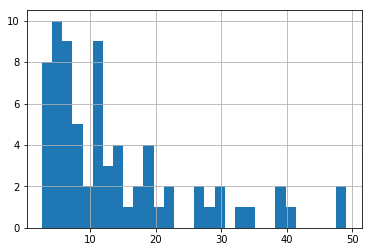

In [176]:
(batched_guesses_results['WorkTimeInSeconds']/60).hist(bins=30)

In [160]:
guesses_results = []
for i, row in batched_guesses_results.iterrows():
    for page in json.loads(row['Answer.results']):
#         print(page)
        guess_indices = [guess['idx'] for guess in page['guesses']]
#         guessed_right_sometime = [row.correctIdx in row.guess_indices for row in mturk_nafc_results.itertuples()]
        stimulus_url = [img for img in page['images'] if img['isCorrect']][0]['url']
        guesses_results.append(dict(
            guesser=row['WorkerId'],
            description=page['description'],
            num_guesses=len(guess_indices),
            stimulus_url=stimulus_url))
pd.DataFrame(guesses_results)

,description,guesser,num_guesses,stimulus_url
0,dozens of people line the gray sidewalks adjac...,A89R5XGMHOTJE,1,http://images.cocodataset.org/train2017/000000...
1,a newly wedded couple cutting there wedding ca...,A89R5XGMHOTJE,1,http://images.cocodataset.org/train2017/000000...
2,a man with blonde hair and a white and black w...,A89R5XGMHOTJE,1,http://images.cocodataset.org/train2017/000000...
3,people are standing on the beach flying colorf...,A89R5XGMHOTJE,4,http://images.cocodataset.org/train2017/000000...
4,a train is coming on a rail road,A89R5XGMHOTJE,6,http://images.cocodataset.org/train2017/000000...
5,a tricolor cat is sitting in front of a partia...,A89R5XGMHOTJE,3,http://images.cocodataset.org/train2017/000000...
6,a closed shower door with crackled glass encas...,A89R5XGMHOTJE,1,http://images.cocodataset.org/train2017/000000...
7,a tennis player in a white shirt and tan short...,A89R5XGMHOTJE,1,http://images.cocodataset.org/train2017/000000...
8,a bathroom with a toilet and sink and with a r...,A89R5XGMHOTJE,1,http://images.cocodataset.org/val2017/00000043...
9,dozens of people line the gray sidewalks adjac...,A1DKVUTOBPQH11,2,http://images.cocodataset.org/train2017/000000...


In [ ]:
result_files = list((paths.data / 'mturk').glob('*-guesstheimage.csv'))
mturk_nafc_results = (
    pd.concat([pd.read_csv(str(f)) for f in result_files], axis=0, ignore_index=True)
    if len(result_files)
    else pd.DataFrame([], columns=['Answer.description', 'Answer.guesses', 'Input.correct_idx']))
mturk_nafc_results = mturk_nafc_results.rename(columns={'Input.correct_idx': 'correctIdx'})
print("Loaded", len(mturk_nafc_results), "guess task results")

In [ ]:
mturk_nafc_results['guesses'] = mturk_nafc_results['Answer.guesses'].map(json.loads)

In [ ]:
mturk_nafc_results['guess_indices'] = [[guess['idx'] for guess in row.guesses] for row in mturk_nafc_results.itertuples()]
mturk_nafc_results['guessed_right_sometime'] = [row.correctIdx in row.guess_indices for row in mturk_nafc_results.itertuples()]

In [ ]:
mturk_nafc_results = mturk_nafc_results[mturk_nafc_results['guessed_right_sometime']]
print(len(mturk_nafc_results), "remain")

In [ ]:
mturk_nafc_results['num_guesses'] = [row.guess_indices.index(row.correctIdx) + 1 for row in mturk_nafc_results.itertuples()]

In [ ]:
num_responses_by_caption = mturk_nafc_results.groupby('Answer.description').size().to_dict()

### Generate tasks remaining

In [ ]:
trials_todo = [trial for trial in trial_data if num_responses_by_caption.get(trial['text'], 0) < 3]
len(trial_data), len(trials_todo)

In [ ]:
i = 0
while True:
    out_fn = paths.data / 'anno-tasks' / f'{datetime.date.today().isoformat()}-{i}-nAFC.csv'
    if not out_fn.exists():
        break
    i += 1
out_fn

In [ ]:
rs = np.random.RandomState(1234)
pd.DataFrame([make_task(trial, rs) for trial in trials_todo]).to_csv(out_fn, index=False)

### Generate the actual HIT text...

In [ ]:
from jinja2 import Template
html = Template(open(paths.top_level / 'HITs' / '2018-05-04-image-description-match.jinja.html').read()).render(dict(
    description='${description}',
    images=['${image_%d_url}' % i for i in range(10)]))

In [ ]:
html2 = html
trial = trial_data[18+7*9]
for k, v in make_task(trial['stimulus'], trial['text']).items():
    html2 = html2.replace('${' + k + '}', str(v))
HTML('<div style="height: 1000px; position: relative;">'+html2+'</div>')
# print(html2)

In [ ]:
import subprocess
subprocess.Popen('pbcopy', stdin=subprocess.PIPE).communicate(html.encode('utf-8'))

# Analyze MTurk results

In [ ]:
mturk_nafc_results.groupby('Answer.description').num_guesses.mean().to_dict()

In [ ]:
%matplotlib inline

In [ ]:
(mturk_nafc_results['WorkTimeInSeconds'][mturk_nafc_results['WorkTimeInSeconds'] < 5*60] / 60).hist(bins=30)

In [ ]:
np.median(mturk_nafc_results['WorkTimeInSeconds'] / 60) * 9/60

In [ ]:
(
    15 # participants
    * 3 # conditions per participant
    * 3 # captions per condition
    - 1 # image not shown
) * 3 # annotators per description


In [ ]:
    * .24 # reward per annotator
) * 1.2 # MTurk 20% fee

Did the same worker see the same target image multiple times?

In [ ]:
next(data.iterrows())[1]['Input.image_0_url']

In [ ]:
mturk_nafc_results['target_image_url'] = [row['Input.image_'+str(row['correctIdx'])+"_url"] for _, row in mturk_nafc_results.iterrows()]

In [ ]:
bad_worker_image_pairs = set()
for worker_id, data in mturk_nafc_results.groupby('WorkerId'):
    target_images = [row['target_image_url'] for _, row in data.iterrows()]
    if len(target_images) != len(set(target_images)):
#         print(worker_id)
        value_counts = pd.Series(target_images).value_counts()
        value_counts = value_counts[value_counts > 1]
#         print(value_counts)
        for img in value_counts.index:
            bad_worker_image_pairs.add((worker_id, img))
bad_worker_image_pairs

annotation_row_is_bad = [
    (row['WorkerId'], row['target_image_url']) in bad_worker_image_pairs
    for _, row in mturk_nafc_results.iterrows()
]
mturk_nafc_results['row_is_bad'] = annotation_row_is_bad

In [ ]:
mturk_nafc_results['row_is_bad'].mean()

In [ ]:
guess_results = mturk_nafc_results[~mturk_nafc_results['row_is_bad']].rename(columns={'Answer.description': 'text'})

In [ ]:
len(mturk_nafc_results)

In [ ]:
len(guess_results), len(trial_data)

In [ ]:
trial_data

In [ ]:
annotator_level_data = pd.merge(
    pd.DataFrame(trial_data).rename(columns={'participant': 'writer'}),
    guess_results.rename(columns={'WorkerId': 'guesser'}).drop(['HITId', 'HITTypeId', 'Title', 'Description', 'Keywords', 'RequesterAnnotation', 'guesses'], axis=1),
    on='text', validate='1:m', how='right')
annotator_level_data
    #.groupby().num_guesses.mean().to_frame('mean_num_guesses'),
#     left_on='text', right_index=True).groupby('condition').mean_num_guesses.aggregate(['mean', 'std'])

In [161]:
guesses_results[0]

{'guesser': 'A89R5XGMHOTJE',
 'description': 'dozens of people line the gray sidewalks adjacent to tall buildings as a two deck bus and vehicle progress on the street',
 'num_guesses': 1,
 'stimulus_url': 'http://images.cocodataset.org/train2017/000000247576.jpg'}

In [162]:
annotator_level_data = pd.merge(
    pd.DataFrame(trial_data).rename(columns={'participant': 'writer'}),
    pd.DataFrame(guesses_results).rename(columns={'description': 'text'}),
    on='text', validate='1:m', how='right')
annotator_level_data
    #.groupby().num_guesses.mean().to_frame('mean_num_guesses'),
#     left_on='text', right_index=True).groupby('condition').mean_num_guesses.aggregate(['mean', 'std'])

,block,condition,idx,idx_in_block,writer,stimulus,text,guesser,num_guesses,stimulus_url
0,0,general,0,0,jvccx2,275449,a yellow cat with strips is setting on a place...,A1TARNH07A75CG,1,http://images.cocodataset.org/train2017/000000...
1,0,general,0,0,jvccx2,275449,a yellow cat with strips is setting on a place...,A3GEL5PWFIK05S,1,http://images.cocodataset.org/train2017/000000...
2,0,general,0,0,jvccx2,275449,a yellow cat with strips is setting on a place...,A185P3B2MC2K83,1,http://images.cocodataset.org/train2017/000000...
3,0,general,1,1,jvccx2,396295,a small bath with a shower with a blue mat on ...,A3VENK02U0X16N,1,http://images.cocodataset.org/train2017/000000...
4,0,general,1,1,jvccx2,396295,a small bath with a shower with a blue mat on ...,AJRY9ALX8069Y,1,http://images.cocodataset.org/train2017/000000...
5,0,general,1,1,jvccx2,396295,a small bath with a shower with a blue mat on ...,A3L2FPKRD46FRW,1,http://images.cocodataset.org/train2017/000000...
6,0,general,2,2,jvccx2,431140,a bath room with a white toilet and a white wa...,A2ECXGDFC0NJEL,2,http://images.cocodataset.org/val2017/00000043...
7,0,general,2,2,jvccx2,431140,a bath room with a white toilet and a white wa...,A3FCZNB9E8K3CX,2,http://images.cocodataset.org/val2017/00000043...
8,0,general,2,2,jvccx2,431140,a bath room with a white toilet and a white wa...,AIZTLQM7HHQN6,2,http://images.cocodataset.org/val2017/00000043...
9,1,norecs,3,0,jvccx2,227326,a newly wedded couple cutting there wedding ca...,A89R5XGMHOTJE,1,http://images.cocodataset.org/train2017/000000...


In [ ]:
annotator_level_data.columns

In [163]:
annotator_level_data.to_csv('annotator_level_data_2018-05-22.csv', index=False)

In [164]:
%load_ext rpy2.ipython

In [165]:
%%R
library(lme4)
library(ggplot2)

/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Loading required package: Matrix

  warnings.warn(x, RRuntimeWarning)
/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Need help? Try the ggplot2 mailing list:
http://groups.google.com/group/ggplot2.

  warnings.warn(x, RRuntimeWarning)


In [167]:
%%R -i annotator_level_data
(model = lmer(num_guesses ~ condition + (1|writer) + (1|guesser) + (1|stimulus), annotator_level_data))

Linear mixed model fit by REML ['lmerMod']
Formula: num_guesses ~ condition + (1 | writer) + (1 | guesser) + (1 |  
    stimulus)
   Data: annotator_level_data
REML criterion at convergence: 2796.064
Random effects:
 Groups   Name        Std.Dev.
 guesser  (Intercept) 0.3940  
 writer   (Intercept) 0.5924  
 stimulus (Intercept) 0.5444  
 Residual             1.9864  
Number of obs: 648, groups:  guesser, 72; writer, 24; stimulus, 9
Fixed Effects:
      (Intercept)    conditionnorecs  conditionspecific  
           2.4894            -0.2437            -0.2058  


In [168]:
%%R -i annotator_level_data
(null_model = lmer(num_guesses ~ (1|writer) + (1|guesser) + (1|stimulus), annotator_level_data))

Linear mixed model fit by REML ['lmerMod']
Formula: num_guesses ~ (1 | writer) + (1 | guesser) + (1 | stimulus)
   Data: annotator_level_data
REML criterion at convergence: 2794.715
Random effects:
 Groups   Name        Std.Dev.
 guesser  (Intercept) 0.4056  
 writer   (Intercept) 0.5907  
 stimulus (Intercept) 0.5415  
 Residual             1.9846  
Number of obs: 648, groups:  guesser, 72; writer, 24; stimulus, 9
Fixed Effects:
(Intercept)  
       2.34  


In [169]:
%%R
library(pbkrtest)

In [170]:
%%R
(kr <- KRmodcomp(model, null_model))

F-test with Kenward-Roger approximation; computing time: 1.37 sec.
large : num_guesses ~ condition + (1 | writer) + (1 | guesser) + (1 | 
    stimulus)
small : num_guesses ~ (1 | writer) + (1 | guesser) + (1 | stimulus)
          stat      ndf      ddf F.scaling p.value
Ftest   0.8853   2.0000 613.4016   0.99998  0.4131


In [ ]:
%%R -i annotator_level_data
(glm.full = glmer(num_guesses ~ condition + (1|writer) + (1|target_image_url), annotator_level_data, family=poisson()))
#  (1|guesser)

In [ ]:
%%R
(glm.null = glmer(num_guesses ~ (1|writer) + (1|target_image_url), annotator_level_data, family=poisson()))

In [ ]:
%%R
confint(glm.full)

In [ ]:
%%R
anova(glm.full, glm.null, test="Chisq")

In [ ]:
results = pd.DataFrame([dict(trial, specificity=specificity_lookup[trial['text'].strip()]) for trial in trial_data])
for col in ['condition', 'participant']:
    results[col] = results[col].astype('category')
results.info()

In [ ]:
results.groupby('condition').specificity.mean()

In [ ]:
pd.DataFrame(trial_data).sample(frac=1.0).sort_values('stimulus').to_csv('trial_data_by_stimulus.csv')

# How many images does this caption apply to?

In [ ]:
data = pd.read_csv("/Users/kcarnold/Downloads/Submitted Captions - Sheet1.csv").iloc[:,:6]

In [ ]:
data

In [ ]:
data.shape

In [ ]:
data = data.dropna().copy()
data.shape

In [ ]:
data['is_unique'] = (data.iloc[:,5] == '1')
data.is_unique.mean()

In [ ]:
data.groupby(['block', 'idx_in_block', 'condition']).is_unique.mean()

In [ ]:
data['participant'] = data['participant'].astype('category')
data['condition'] = data['condition'].astype('category')

In [ ]:
data.groupby('condition').is_unique.mean()

In [ ]:
%%R -i data
transformed <- art(is_unique ~ condition + (1|participant), data=data)
summary(transformed)
anova(transformed)

In [ ]:
example = trial_data[-1]['text']
example

Concepts: traffic light. COCO doesn't have "pedestian crossing sign". There are 4330 images with traffic lights in them in COCO. That's way too much. Looking at Visual Genome.

Visual Genome synsets are potentially best, but they're sometimes inaccurate. e.g., "18 wheeler" is "cyclist.n.01". So let's consider an object a match if matches either the synset or object name.

In [ ]:
vg_base = pathlib.Path('/Data/VisualGenome')
image_objects = json.load(open(vg_base / 'objects.json'))

In [ ]:
img_by_id = {img['image_id']: img for img in image_objects}

In [ ]:
obj_synsets = json.load(open(vg_base / 'object_synsets.json'))

In [ ]:
obj_attributes = json.load(open(vg_base / 'attributes.json'))

In [ ]:
len(obj_attributes), len(image_objects)

In [ ]:
obj_attributes[0].keys()

In [ ]:
attributes_by_img = {att['image_id']: att['attributes'] for att in obj_attributes}

In [ ]:
attributes_by_img[61514]

In [ ]:
# def has_object(obj_name):
#     return {
#         img['image_id'] for img in image_objects
#         if any(obj_name in '\n'.join(obj['names']) for obj in img['objects'])
#            }
def has_object(imgid, obj_name):
    return any(obj_name in '\n'.join(obj['names']) for obj in attributes_by_img[imgid])

In [ ]:
# def has_synset(obj_synset):
#     return {
#         img['image_id'] for img in image_objects
#         if any(obj_synset in obj['synsets'] for obj in img['objects'])}
def has_synset(imgid, obj_synset):
    return any(obj_synset in obj['synsets'] for obj in attributes_by_img[imgid])

In [ ]:
def has_obj_with_attr(imgid, obj_name, attr):
    return any(
        (obj_name in '\n'.join(obj['names'])) and (attr in obj.get('attributes', []))
        for obj in attributes_by_img[imgid])

def has_synset_with_attr(imgid, obj_synset, attr):
    return any(
        (obj_synset in obj['synsets']) and (attr in obj.get('attributes', []))
        for obj in attributes_by_img[imgid])

def has_obj_without_attr(imgid, obj_name, attr):
    return any(
        (obj_name in '\n'.join(obj['names'])) and (attr not in obj.get('attributes', []))
        for obj in attributes_by_img[imgid])

def has_synset_without_attr(imgid, obj_synset, attr):
    return any(
        (obj_synset in obj['synsets']) and (attr not in obj.get('attributes', []))
        for obj in attributes_by_img[imgid])

In [ ]:
obj_synsets['pedestrian sign']

In [ ]:
# candidates = (
#     (has_object('pedestrian sign') | has_object('pedestrian crossing sign') | has_object('crossing sign') | has_object('sign')) &
#     (has_object('traffic light') | has_synset('traffic_light.n.01'))
# )
candidates = {
    imgid for imgid in attributes_by_img.keys()
    if (
        (
            has_object(imgid, 'pedestrian sign') |
            has_object(imgid, 'pedestrian crossing sign') |
            has_object(imgid, 'crossing sign') |
            has_obj_with_attr(imgid, 'sign', 'yellow')
        ) & (
            has_obj_without_attr(imgid, 'traffic light', 'red') |
            has_synset_without_attr(imgid, 'traffic_light.n.01', 'red')
        ))}
len(candidates)

In [ ]:
show_images(candidates)

In [ ]:
[img['image_id'] for img in image_objects if '61514' in img.get('image_url', '')]
#Image(img_by_id[61514]['image_url'])

In [ ]:
img_by_id[61514]

# Measuring Specificity

We use paired comparisons to analyze specificity and accuracy. For a target image $x$ and a fixed set of imposter images $Y$, the **specific accuracy** of a caption is the fraction of comparisons that chose $x$. 

We start with our dataset of paired comparisons.

In [ ]:
captions = [
    "exactly how are both the dog and the person going to fit on that skateboard?",
    "the dark haired dog is trying to ride on the skateboard.",
    "a person in shorts and a black dog both have one foot on a skateboard.",
    "a dog with a black head and black legs and ears standing up has one black paw on a black skateboard with white wheels and a guy with black and white shoes and white socks has one foot on the skateboard also and there are bikes and other people in the background"
]

In [ ]:
alternatives = 'dog-and-guy-on-skateboard just-dog-on-skateboard guy-on-skateboard-holding-dog dog-and-guy-next-to-skateboard'.split()
target = alternatives[0]
imposters = alternatives[1:]
applies_to = [
    'dog-and-guy-on-skateboard dog-and-guy-next-to-skateboard'.split(),
    'just-dog-on-skateboard'.split(),
    'dog-and-guy-on-skateboard'.split(),
    'dog-and-guy-on-skateboard just-dog-on-skateboard guy-on-skateboard-holding-dog dog-and-guy-next-to-skateboard'.split()
]
applies_to = {cap: tgts for cap, tgts in zip(captions, applies_to)}
applies_to

In [ ]:
import random
random.seed(0)
pairs = [[target, imposter] for imposter in imposters]
for pair in pairs:
    random.shuffle(pair)
pairs

In [ ]:
def fake_answer_pairs_for_caption(applies, pairs):
    outcomes = []
    for a, b in pairs:
        choices = []
        if a in applies:
            choices.append(0)
        if b in applies:
            choices.append(1)
        if len(choices) == 0:
            choices = [0, 1]
        outcomes.append(random.choice(choices))
    return outcomes
fake_answer_pairs_for_caption(applies_to[captions[0]], pairs)

In [ ]:
fake_comparisons_data = []
for caption in captions:
    for annotator in range(5):
        for pair, outcome in zip(pairs, fake_answer_pairs_for_caption(applies_to[caption], pairs)):
            picked = pair[outcome]
            fake_comparisons_data.append(dict(
                caption=caption,
                annotator=annotator,
                pair=pair,
                picked=picked))

In [ ]:
data = pd.DataFrame(fake_comparisons_data)
len(data)

In [ ]:
data['picked_correct'] = data['picked'] == 'dog-and-guy-on-skateboard'
data.groupby('caption').picked_correct.mean().sort_values()

# Final analyses

We find a main effect of writing condition on outcome specificity.

In [ ]:
%load_ext rpy2.ipython

In [ ]:
results = pd.DataFrame([
    dict(participant_id=participant_id, condition=condition)
    for participant_id in 'abc def ghi'.split() for condition in 'general specific norecs'.split()
])
results['participant_id'] = results['participant_id'].astype('category')
results['condition'] = results['condition'].astype('category')
results['specificity'] = np.random.randn(len(results))

In [ ]:
%%R
#install.packages("ARTool")
library(ARTool)

In [ ]:
%%R -i results
summary(results)

In [ ]:
%%R -i results
transformed <- art(specificity ~ condition + (1|participant), data=results)
summary(transformed)
anova(transformed)